# **AI Enabler Program**

---

# <span style="font-size: 24px; color: blue;">Why Do We Need NumPy and Pandas?</span>

In this notebook, we'll explore:
1. Why **vanilla Python** is not enough for handling large data.
2. The importance of **NumPy** for working with arrays and performing mathematical operations efficiently.
3. Why **Pandas** is essential for data manipulation and analysis.
4. How NumPy and Pandas work together in real-world scenarios.
5. A demonstration of basic **Exploratory Data Analysis (EDA)**, data preprocessing, and fitting a simple model on a popular dataset.

*Each section will explain concepts step-by-step with clear examples. By the end, you'll understand the synergy between Python, NumPy, and Pandas in data science.*

---

### Why Vanilla Python is Not Enough

## <span style="color: blue;">Limitations of Vanilla Python for Large Data Processing</span>

Python is a versatile language, but it has limitations when dealing with large datasets:

1. **Inefficient for Large Arrays**:
   - Lists in Python are flexible but slow for numerical computations.
   - Operations on Python lists are not optimized for speed.

2. **Memory Overhead**:
   - Python lists use more memory as they store additional metadata with each element.

3. **Lack of Vectorized Operations**:
   - Python lists do not support vectorized operations (e.g., adding two lists element-wise).
   - You need to write explicit loops, which are slow for large datasets.

## <span style="color: green;">What is NumPy?</span>

**NumPy** (Numerical Python) is a library that provides support for:
- Large, multi-dimensional arrays and matrices.
- High-level mathematical functions to operate on these arrays.

### Advantages of NumPy:
1. **Efficiency**: NumPy arrays are faster and use less memory compared to Python lists.
2. **Vectorized Operations**: Perform element-wise operations without explicit loops.
3. **Convenient Functions**: Built-in functions for mathematical, statistical, and logical operations.

---

# Code Example:

*Lets start by installing the dependencies*

In [1]:
!pip install ipython numpy pandas matplotlib seaborn

In [2]:
import time
import numpy as np

#### Using a python list

In [3]:
large_list = list(range(1, 1000000))
start_time = time.time()
squared_list = [x**2 for x in large_list]
end_time = time.time()
print(f"Time taken with Python list: {end_time - start_time:.4f} seconds")

Time taken with Python list: 0.0282 seconds


In [4]:
large_array = np.arange(1, 1000000)
start_time = time.time()
squared_array = large_array ** 2
end_time = time.time()
print(f"Time taken with NumPy array: {end_time - start_time:.4f} seconds")

Time taken with NumPy array: 0.0041 seconds


##### When comparing the performance of squaring elements in a Python list and a NumPy array, it's clear that NumPy arrays are significantly faster. 

---
---

### Why NumPy is Not Enough

## <span style="color: darkorange;">Limitations of NumPy</span>

While NumPy is great for numerical operations, it has its limitations:
1. **Lack of High-Level Data Manipulation**:
   - NumPy focuses on numerical computations, but lacks tools for working with structured data.

2. **No Labels for Data**:
   - NumPy arrays do not support row or column labels, making them less intuitive for analyzing tabular data.

3. **Limited File Handling**:
   - Reading and writing data files (e.g., CSV) is cumbersome with NumPy.

To overcome these limitations, we use **Pandas**.

In [5]:
from IPython.display import Image, display, HTML

In [6]:
display(HTML("""
    <figure>
        <img src="./images/numpy_array.png" width="400" height="300" />
        <figcaption style="text-align: center;">NumPy Array Example</figcaption>
    </figure>
"""))

display(HTML("""
    <figure>
        <img src="./images/pandas_dataframe.png" width="400" height="300" />
        <figcaption style="text-align: center;">Pandas DataFrame Example</figcaption>
    </figure>
"""))

#### Pandas output seems easy to interpret right ?

---

### Introduction to Pandas

## <span style="font-size: 20px; color: purple;">What is Pandas?</span>

**Pandas** is a library for data manipulation and analysis. It provides two primary data structures:
1. **Series**: One-dimensional labeled arrays (similar to a column in a spreadsheet).
2. **DataFrame**: Two-dimensional labeled data (similar to a table in a spreadsheet).

### Key Features of Pandas:
1. **Ease of Use**:
   - Intuitive methods for reading/writing data, filtering, grouping, and aggregating.

2. **Data Cleaning**:
   - Handle missing data, duplicates, and more.

3. **Integration**:
   - Works seamlessly with NumPy for numerical computations.

### Example: Pandas in Action
Let's see how Pandas simplifies working with tabular data.

---

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lets load and see what our data looks like

In [8]:
df = pd.read_csv('./datasets/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,NaN,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,NaN,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,NaN,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df.shape

(1303, 12)

The dataset currently has limited samples, and performance improves as the amount of data increases. 
However, many features in this dataset contain hidden insights that require careful extraction. For example:

- **Screen Resolution**: Contains details such as IPS display, AMOLED display, etc.
- **CPU**: Includes information like i5, i7, etc.

**Passing these raw features directly** to the model will not yield optimal performance. To maximize the model's performance, it is crucial to perform **feature engineering**. This involves extracting and representing the hidden details within these features in a meaningful and structured way.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1176 non-null   object 
 3   Inches            1173 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

Unnamed: 0            0
Company               0
TypeName            127
Inches              130
ScreenResolution      0
Cpu                   0
Ram                   0
Memory                0
Gpu                   0
OpSys                 0
Weight                0
Price                 0
dtype: int64

In [13]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1173.000000,1303.000000
mean,651.00000,15.023785,59870.042910
std,376.28801,1.419371,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


<Axes: ylabel='Frequency'>

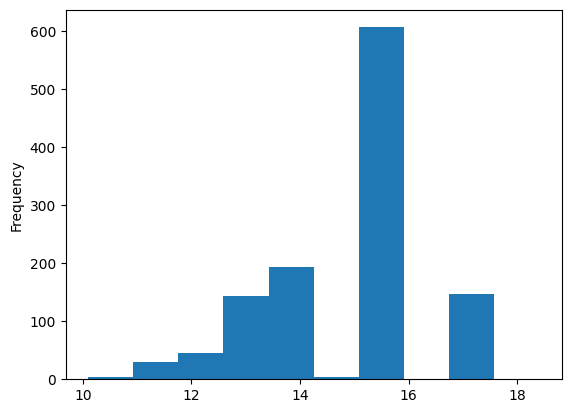

In [14]:
df["Inches"].plot(kind="hist")

#### Why filling the Inches column with median makes sense ?

As it better represents the central tendency of the **left-skewed distribution** and avoids being influenced by outliers.


In [15]:
df['Inches'] = df['Inches'].fillna(df['Inches'].median())

### Why Should You Remove the NA Values from **TypeName** Instead of Imputing?

Filling the missing values in the **TypeName** column (laptop category) with imputation may lead to incorrect or misleading results, especially when the missing data is from specific categories like "Apple". For example:

- **Example**:  
   Let's say we have a few missing **TypeName** values for Apple laptops. If we impute these missing values using a model or simple imputation technique (like the mode), it might sound illogical in such cases when Apple laptops start being Gaming. However, Apple laptops are typically **Ultrabooks** or **MacBooks**, not gaming laptops.

- **Why it Makes No Sense**:  
   - **Mismatch in Categories**: Imputing with the wrong category (e.g., predicting **Gaming** for an Apple laptop) could mislead the model into making false assumptions about the data.
   - **Inconsistent Information**: **Apple laptops** are known for specific types like **Ultrabooks** or **MacBooks**, and treating them as **Gaming** laptops could introduce inconsistencies, affecting model accuracy.

Therefore, it is better to either **remove rows with missing TypeName values**.


In [16]:
df = df.dropna(subset=["TypeName"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 0 to 1300
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1176 non-null   int64  
 1   Company           1176 non-null   object 
 2   TypeName          1176 non-null   object 
 3   Inches            1176 non-null   float64
 4   ScreenResolution  1176 non-null   object 
 5   Cpu               1176 non-null   object 
 6   Ram               1176 non-null   object 
 7   Memory            1176 non-null   object 
 8   Gpu               1176 non-null   object 
 9   OpSys             1176 non-null   object 
 10  Weight            1176 non-null   object 
 11  Price             1176 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 119.4+ KB


#### The Unnamed : 0 column has no usecase

In [18]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,15.6,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
4,Apple,Ultrabook,15.6,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000


In [19]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [20]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [21]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,15.6,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
4,Apple,Ultrabook,15.6,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 0 to 1300
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1176 non-null   object 
 1   TypeName          1176 non-null   object 
 2   Inches            1176 non-null   float64
 3   ScreenResolution  1176 non-null   object 
 4   Cpu               1176 non-null   object 
 5   Ram               1176 non-null   int32  
 6   Memory            1176 non-null   object 
 7   Gpu               1176 non-null   object 
 8   OpSys             1176 non-null   object 
 9   Weight            1176 non-null   float32
 10  Price             1176 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.1+ KB


---

## Price distribution

/tmp/ipykernel_38316/708458291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


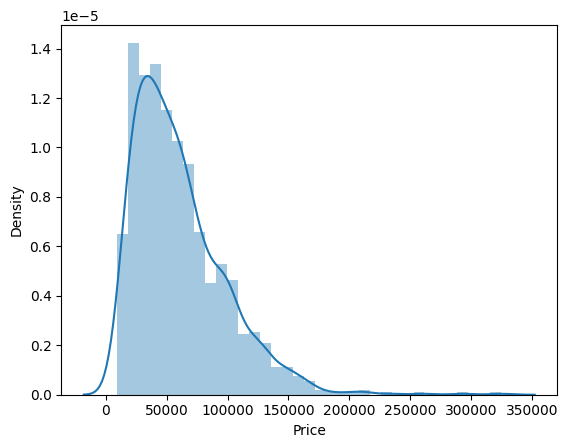

In [47]:
sns.distplot(df['Price'])
plt.show()

- There are many laptops with less price and, less with high price
- Right Skewed

---

## So, which brand people prefer the most ?

<Axes: xlabel='Company'>

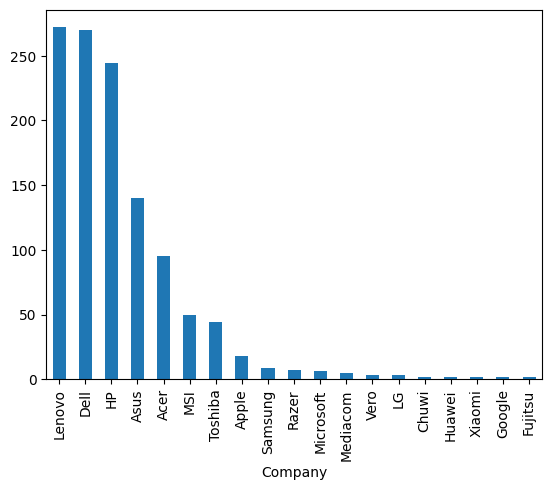

In [51]:
df['Company'].value_counts().plot(kind='bar')

---

## Average Price of each brand

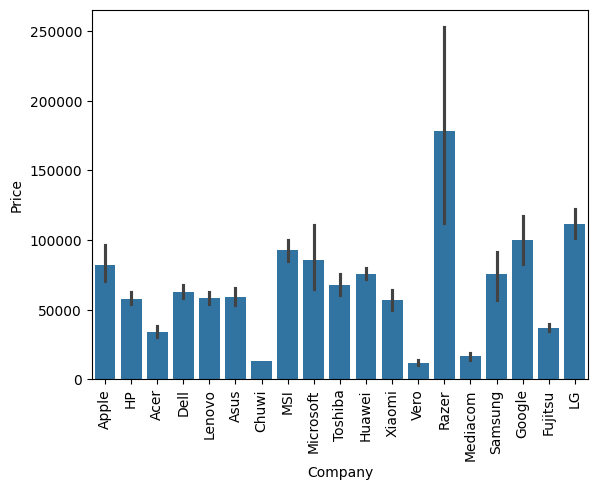

In [25]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Razer** seems to be the most expensive laptop brand here

---

## What kind of laptop is sold the most ?

<Axes: xlabel='TypeName'>

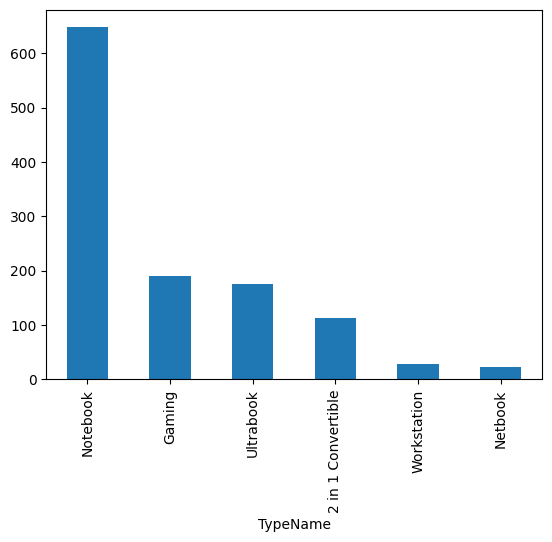

In [26]:
df['TypeName'].value_counts().plot(kind='bar')

We can infer from this plot that, mostly **people prefer budget laptops** since notebooks are mostly found in budget.

---

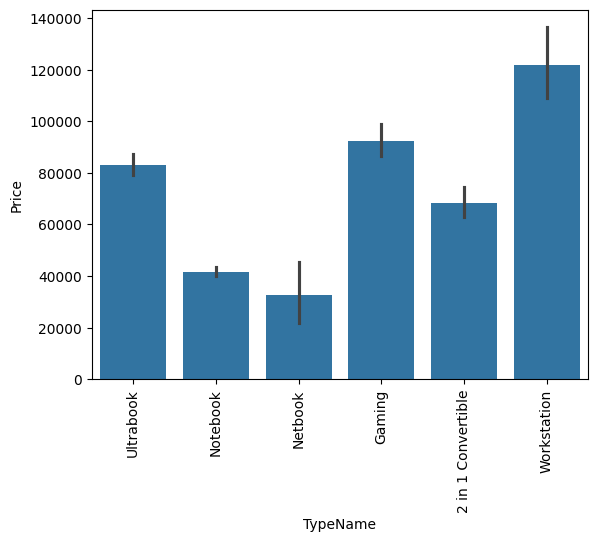

In [27]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipykernel_38316/1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

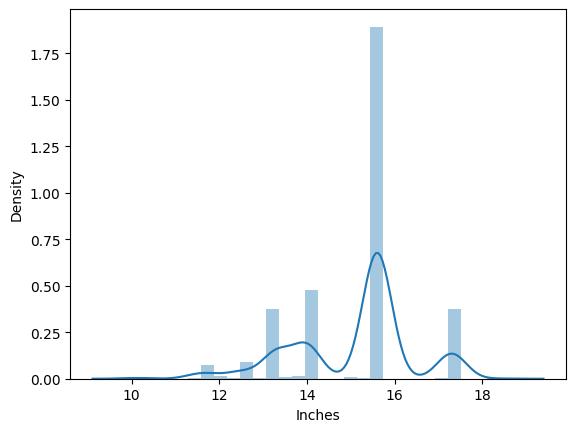

In [28]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

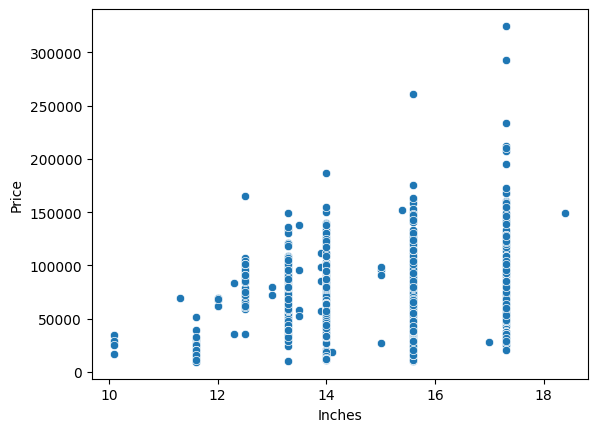

In [29]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [30]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                459
1366x768                                         250
IPS Panel Full HD 1920x1080                      209
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   42
1600x900                                          22
Touchscreen 1366x768                              15
Quad HD+ / Touchscreen 3200x1800                  13
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2560x1440                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2304x1440                 5
IPS Panel Quad HD+ / Touchscr

In [31]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [32]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
467,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,2TB HDD,AMD Radeon 530,Windows 10,2.02,40439.52,0
983,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,34578.72,0
56,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.91,23389.92,0
1167,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,24935.04,0
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0


<Axes: xlabel='Touchscreen'>

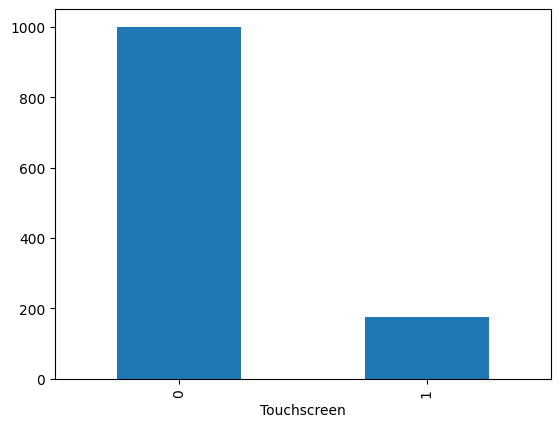

In [33]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

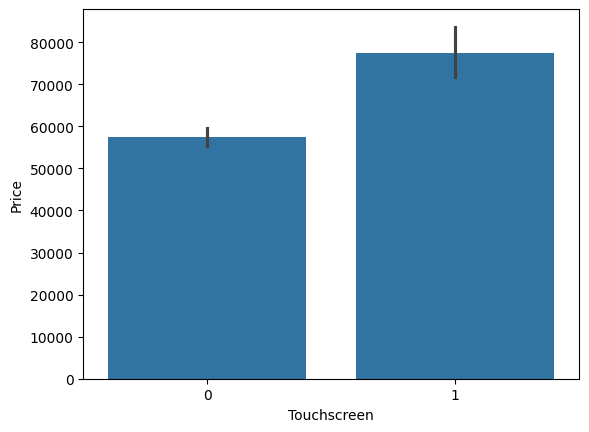

In [34]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [35]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,15.6,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
4,Apple,Ultrabook,15.6,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0


<Axes: xlabel='Ips'>

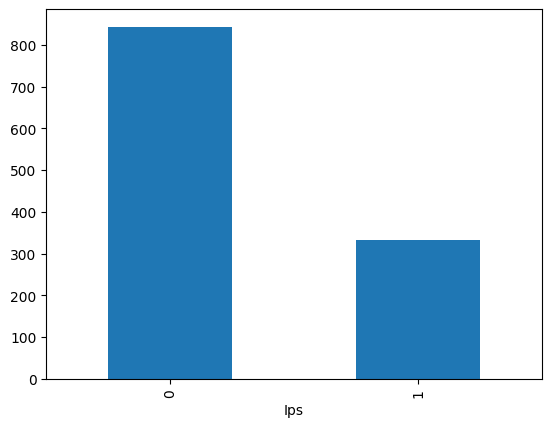

In [37]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

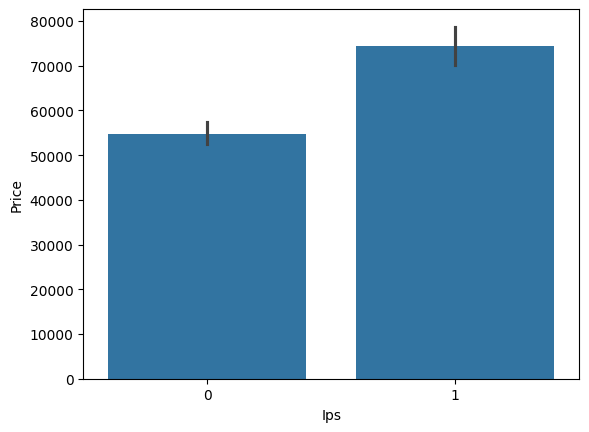

In [38]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [39]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [40]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [41]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
521,HP,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,74538.7200,0,1,IPS Panel Full HD 1920,1080
296,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.50,52161.1200,0,0,Full HD 1920,1080
92,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,63776.1600,0,0,Full HD 1920,1080
876,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Linux,2.00,21258.1872,0,0,1366,768
712,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Linux,1.98,38681.2800,0,0,Full HD 1920,1080


In [42]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,15.6,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
4,Apple,Ultrabook,15.6,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,1366,768


In [44]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 0 to 1300
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1176 non-null   object 
 1   TypeName          1176 non-null   object 
 2   Inches            1176 non-null   float64
 3   ScreenResolution  1176 non-null   object 
 4   Cpu               1176 non-null   object 
 5   Ram               1176 non-null   int32  
 6   Memory            1176 non-null   object 
 7   Gpu               1176 non-null   object 
 8   OpSys             1176 non-null   object 
 9   Weight            1176 non-null   float32
 10  Price             1176 non-null   float64
 11  Touchscreen       1176 non-null   int64  
 12  Ips               1176 non-null   int64  
 13  X_res             1176 non-null   int64  
 14  Y_res             1176 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 137.8+ KB


In [46]:
df.corr()['Price']

ValueError: could not convert string to float: 'Apple'